In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
cd /content/drive/MyDrive/Colab Notebooks/ntut-ml-regression-2021

/content/drive/MyDrive/Colab Notebooks/ntut-ml-regression-2021


In [3]:
data_train = pd.read_csv("train-v3.csv")
X_train = data_train.drop(['price','id'],axis=1)
Y_train = data_train['price'].values

data_valid = pd.read_csv("valid-v3.csv")
X_valid = data_valid.drop(['price','id'],axis=1)
Y_valid = data_valid['price'].values

data_test = pd.read_csv("test-v3.csv")
X_test = data_test.drop(['id'],axis=1)
print(X_train)

       sale_yr  sale_month  sale_day  ...     long  sqft_living15  sqft_lot15
0         2015           3        27  ... -121.986           1280        6532
1         2014           9         2  ... -122.261           2500       11100
2         2014          12        11  ... -122.376           1630        7885
3         2015           4        30  ... -122.217           1492        8924
4         2015           3        31  ... -122.021           2170        7503
...        ...         ...       ...  ...      ...            ...         ...
12962     2014           7         1  ... -122.112           2200       12851
12963     2014           6        28  ... -121.723           2760       35440
12964     2015           5         6  ... -122.272           1110        3515
12965     2014           6        23  ... -121.999           1630        3348
12966     2014           5        24  ... -122.351           1510        2151

[12967 rows x 21 columns]


Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms'],
      dtype='object')


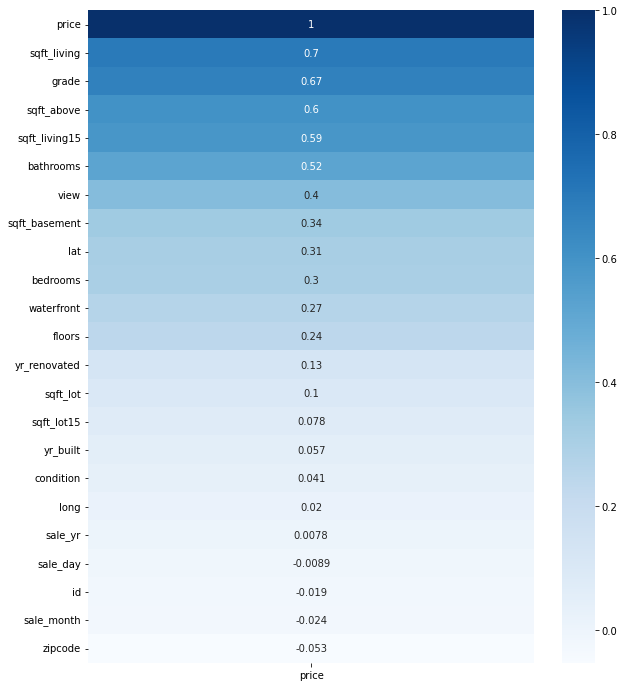

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
trian_corr=data_train.corr(method ='pearson')[['price']].sort_values(by='price',ascending=False) #計算相關係數
plt.subplots(figsize=(10, 12))  
sns.heatmap(trian_corr,annot=True, vmax=1, cmap="Blues")
high_corr = trian_corr.index[abs(trian_corr["price"])>0.5]
print(high_corr)

In [ ]:
for i in X_train.columns: #查找原本資料中所有columns
    if i not in high_corr: #如果沒有相關係數大於0.6的話
        X_train = X_train.drop(i,axis=1) #就把它拔掉
for i in X_valid.columns: #查找原本資料中所有columns
    if i not in high_corr: #如果沒有相關係數大於0.6的話
        X_valid = X_valid.drop(i,axis=1)
for i in X_test.columns: #查找原本資料中所有columns
    if i not in high_corr: #如果沒有相關係數大於0.6的話
        X_test = X_test.drop(i,axis=1)
#X_train=X_train.drop(['price'],axis=1)
#X_valid=X_valid.drop(['price'],axis=1)
print(X_train)
print(X_valid)
print(X_test)

       bathrooms  sqft_living  grade  sqft_above  sqft_living15
0           2.00         1900      7        1900           1280
1           3.00         3380      8        2330           2500
2           2.00         2070      7        1450           1630
3           1.00         1150      6        1150           1492
4           2.50         2040      8        2040           2170
...          ...          ...    ...         ...            ...
12962       2.50         2200      9        2200           2200
12963       2.50         3130      9        3130           2760
12964       1.50         1110      7         950           1110
12965       2.25         1630      7        1630           1630
12966       1.00         1370      7        1370           1510

[12967 rows x 5 columns]
      bathrooms  sqft_living  grade  sqft_above  sqft_living15
0          2.25         3180     10        3180           2840
1          4.50         3780     11        2770           2660
2          2.50  

In [4]:
from sklearn.preprocessing import *
from sklearn import preprocessing
normalize = preprocessing.StandardScaler().fit(X_train)
X_train=scale(X_train)
X_valid=normalize.transform(X_valid)
X_test=normalize.transform(X_test)
print(X_train)

[[ 1.44936867 -1.1494353   1.30755823 ...  1.62707912 -1.02428177
  -0.22839273]
 [-0.68995558  0.78127057 -1.59295217 ... -0.33055772  0.76052871
  -0.06185245]
 [-0.68995558  1.74662351 -0.54876843 ... -1.14920585 -0.51224598
  -0.17906502]
 ...
 [ 1.44936867 -0.50586668 -1.12887051 ... -0.40886319 -1.27298487
  -0.33838662]
 [-0.68995558 -0.18408236  0.84347657 ...  1.53453628 -0.51224598
  -0.34447511]
 [-0.68995558 -0.50586668  0.95949698 ... -0.97123887 -0.68780111
  -0.38811537]]


In [95]:
from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras.layers import Dropout,Dense 
from keras.callbacks import ModelCheckpoint
from tensorflow import keras
model = Sequential()
model.add(Dense(600, input_dim=X_train.shape[1],  kernel_initializer='normal',activation='relu'))
model.add(Dropout=0.1)  
model.add(Dense(230,   kernel_initializer='normal',activation='relu'))  
model.add(Dense(80,   kernel_initializer='normal',activation='relu'))   
model.add(Dense(50,   kernel_initializer='normal',activation='relu'))  
model.add(Dense(10,   kernel_initializer='normal',activation='relu'))  
model.add(Dense(1,  kernel_initializer='normal',activation='linear'))

model.compile(loss='MAE', optimizer='adam')

TypeError: ignored

In [92]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (None, 400)               8800      
                                                                 
 dense_127 (Dense)           (None, 230)               92230     
                                                                 
 dense_128 (Dense)           (None, 80)                18480     
                                                                 
 dense_129 (Dense)           (None, 50)                4050      
                                                                 
 dense_130 (Dense)           (None, 10)                510       
                                                                 
 dense_131 (Dense)           (None, 1)                 11        
                                                                 
Total params: 124,081
Trainable params: 124,081
Non-t

In [93]:
call = ModelCheckpoint('good.h5',
                     monitor = 'val_loss',
                     verbose = 0,
                     save_best_only = True,
                     save_weights_only = True,
                     mode = 'auto',
                     period = 1)   
history = model.fit(X_train, Y_train,
                    validation_data = (X_valid, Y_valid),
                    callbacks = [call],
                    epochs = 140, 
                    batch_size = 40, verbose = 1)

Epoch 1/140
325/325 [==============================] - 2s 6ms/step - loss: 329869.2188 - val_loss: 133013.5156
Epoch 2/140
325/325 [==============================] - 2s 5ms/step - loss: 119842.9922 - val_loss: 111166.5312
Epoch 3/140
325/325 [==============================] - 2s 5ms/step - loss: 110231.8750 - val_loss: 107472.2109
Epoch 4/140
325/325 [==============================] - 2s 5ms/step - loss: 107623.1406 - val_loss: 106390.9922
Epoch 5/140
325/325 [==============================] - 2s 5ms/step - loss: 106301.0938 - val_loss: 105244.8203
Epoch 6/140
325/325 [==============================] - 2s 5ms/step - loss: 104969.3359 - val_loss: 104199.4688
Epoch 7/140
325/325 [==============================] - 1s 5ms/step - loss: 104378.6719 - val_loss: 103487.1484
Epoch 8/140
325/325 [==============================] - 2s 5ms/step - loss: 103370.0625 - val_loss: 102857.4844
Epoch 9/140
325/325 [==============================] - 1s 4ms/step - loss: 102817.8125 - val_loss: 101769.4141
E

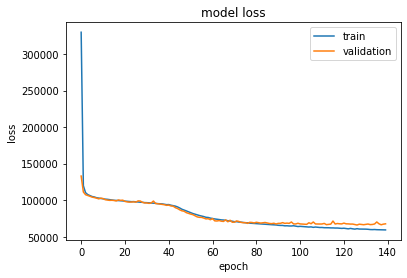

In [94]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.show()

In [85]:
model.load_weights('good.h5') #召喚之前儲存的model
pred = model.predict(X_test) #括號內填入要預測的資料
print(pred)

[[696228.7 ]
 [704353.06]
 [469413.9 ]
 ...
 [306072.28]
 [427862.53]
 [197536.33]]


In [86]:
with open('house_predict.csv', 'w') as f:                  #開啟一個檔案，house_predict.csv是名字；w是寫入
    f.write('id,price\n')                          # 寫入最上方的列，並用\n往下一列
    for i in range(len(pred)):                       #len(pred)看整個test有多長，然後用for去跑全部
        f.write(str(i+1) +  ',' + str(float(pred[i])) + '\n')